In [1]:
import sys
sys.path.insert(0, '../../../network')

In [2]:
import logging
import argparse
import numpy as np
from network import Population, RateNetwork
from learning import ReachingTask
from transfer_functions import ErrorFunction
from connectivity import SparseConnectivity, LinearSynapse, ThresholdPlasticityRule
from sequences import GaussianSequence
import matplotlib.pyplot as plt
logging.basicConfig(level=logging.INFO)

In [3]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi
ctx = Population(N=1000, tau=1e-2, phi=phi, name='ctx')
bg = Population(N=1000, tau=1e-2, phi=phi, name='bg')
plasticity = ThresholdPlasticityRule(x_f=0.5, q_f=0.8) 

S, P = 1, 3
sequences_ctx = [GaussianSequence(P,ctx.size, seed=5) for i in range(S)]
patterns_ctx = np.stack([s.inputs for s in sequences_ctx])
sequences_bg = [GaussianSequence(P,ctx.size, seed=27) for i in range(S)]
patterns_bg = np.stack([s.inputs for s in sequences_bg])

J_cc = SparseConnectivity(source=ctx, target=ctx, p=0.05)
synapse_cc = LinearSynapse(J_cc.K, A=5)
J_cc.store_attractors(patterns_ctx[0], patterns_ctx[0], synapse_cc.h_EE, 
                      plasticity.f, plasticity.g)
J_bb = SparseConnectivity(source=bg, target=bg, p=0.05)
synapse_bb = LinearSynapse(J_bb.K, A=5)
J_bb.store_attractors(patterns_bg[0], patterns_bg[0], synapse_bb.h_EE, 
                      plasticity.f, plasticity.g)
J_cb  = SparseConnectivity(source=bg, target=ctx, p=0.05)
synapse_cb = LinearSynapse(J_cb.K, A=1)
J_cb.store_attractors(patterns_bg[0], patterns_ctx[0], synapse_cb.h_EE, 
                      plasticity.f, plasticity.g)

J_bc = SparseConnectivity(source=ctx, target=bg, p=0.05)
synapse_bc = LinearSynapse(J_bc.K, A=0)
J_bc.store_sequences(patterns_ctx, patterns_bg, synapse_bc.h_EE, plasticity.f, plasticity.g)
net_ctx = RateNetwork(ctx, c_EE=J_cc, c_IE=J_bc, formulation=4)
net_bg = RateNetwork(bg, c_II=J_bb, c_EI=J_cb, formulation=4)

INFO:connectivity:Building connections from ctx to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 17043.57it/s]
INFO:connectivity:Building connections from bg to bg
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 10916.55it/s]
INFO:connectivity:Building connections from bg to ctx
INFO:connectivity:Storing attractors
100%|████████████████████████████████████| 1000/1000 [00:00<00:00, 19082.19it/s]
INFO:connectivity:Building connections from ctx to bg
INFO:connectivity:Storing sequences
100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 11.42it/s]
INFO:connectivity:Applying synaptic transfer function
INFO:connectivity:Building sparse matrix


In [4]:
# init_input_ctx = np.random.RandomState().normal(0,1,size=patterns_ctx[0][0].shape)
# init_input_bg = np.random.RandomState().normal(0,1,size=patterns_bg[0][0].shape)
init_input_ctx = patterns_ctx[0][0]
init_input_bg = patterns_bg[0][0]
T=10
mouse = ReachingTask(3, alpha=0.5)
net_ctx.simulate_learning(mouse, net_bg, T, init_input_ctx, init_input_bg, 
                          phi(patterns_ctx[0]), phi(patterns_bg[0]), plasticity)

INFO:network:Integrating network dynamics
  5%|██                                     | 520/9999 [00:03<00:21, 447.10it/s]

aim-->aim


 10%|███▊                                   | 974/9999 [00:04<00:14, 622.29it/s]

aim-->lick


 14%|█████▏                                | 1367/9999 [00:04<00:13, 645.50it/s]

lick-->lick


 18%|██████▉                               | 1824/9999 [00:05<00:12, 646.78it/s]

lick-->aim


 22%|████████▍                             | 2209/9999 [00:05<00:12, 632.62it/s]

aim-->reach


 26%|██████████                            | 2642/9999 [00:06<00:12, 583.81it/s]

reach-->reach


 31%|███████████▋                          | 3068/9999 [00:07<00:11, 600.72it/s]

reach-->aim


 35%|█████████████▎                        | 3516/9999 [00:08<00:10, 631.11it/s]

aim-->aim


 39%|██████████████▊                       | 3909/9999 [00:08<00:09, 629.12it/s]

aim-->aim


 44%|████████████████▌                     | 4364/9999 [00:09<00:08, 646.57it/s]

aim-->reach


 48%|██████████████████                    | 4756/9999 [00:10<00:08, 645.28it/s]

reach-->aim


 52%|███████████████████▊                  | 5213/9999 [00:10<00:07, 640.03it/s]

aim-->aim


 57%|█████████████████████▌                | 5664/9999 [00:11<00:06, 630.19it/s]

aim-->lick


 60%|██████████████████████▉               | 6049/9999 [00:12<00:06, 628.61it/s]

lick-->aim


 65%|████████████████████████▋             | 6488/9999 [00:12<00:05, 595.88it/s]

aim-->reach


 69%|██████████████████████████▎           | 6940/9999 [00:13<00:04, 635.18it/s]

reach-->lick
Mouse received reward.


 73%|███████████████████████████▊          | 7330/9999 [00:14<00:04, 643.71it/s]

lick-->lick


 78%|█████████████████████████████▌        | 7786/9999 [00:14<00:03, 640.03it/s]

lick-->reach


 82%|███████████████████████████████▎      | 8246/9999 [00:15<00:02, 651.98it/s]

reach-->aim


 87%|█████████████████████████████████     | 8702/9999 [00:16<00:02, 644.95it/s]

aim-->reach


 92%|██████████████████████████████████▊   | 9159/9999 [00:17<00:01, 644.52it/s]

reach-->aim


 97%|████████████████████████████████████▊ | 9687/9999 [00:17<00:00, 650.67it/s]

aim-->aim


100%|█████████████████████████████████████▊| 9951/9999 [00:18<00:00, 653.57it/s]

In [5]:
overlaps_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi)
# correlations_ctx = sequences_ctx[0].overlaps(net_ctx, ctx, phi=phi, correlation=True)
overlaps_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi)
# correlations_bg = sequences_bg[0].overlaps(net_bg, bg, phi=phi, correlation=True)

INFO:sequences:Computing overlaps

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 323.09it/s]
INFO:sequences:Computing overlaps

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 341.27it/s]


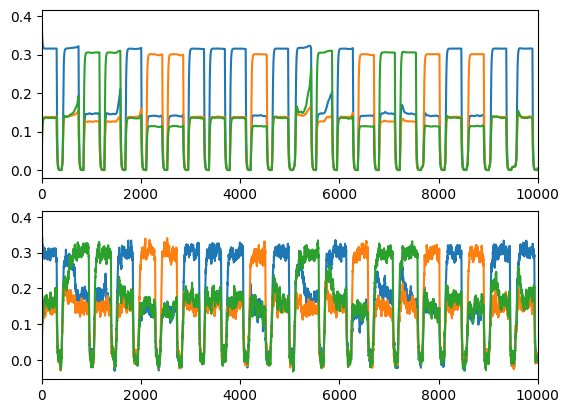

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)
a, b = 0, 10000
for i, v in enumerate(overlaps_ctx):
    axes[0].plot(v, label=str(i))
    axes[0].set_xlim(a, b)
for i, v in enumerate(overlaps_bg):
    axes[1].plot(v, label=str(i))
    axes[1].set_xlim(a, b)
# for i, v in enumerate(overlaps_bg):
#     axes[2].plot(v, label=str(i))
#     axes[2].set_xlim(a, b)
#     axes[0].legend()
# for i, v in enumerate(correlations_bg):
#     axes[3].plot(v, label=str(i))
#     axes[3].set_xlim(a, b)


In [7]:
np.sort(np.array([0, 32, 2]))

array([ 0,  2, 32])

100%|██████████████████████████████████████| 9999/9999 [00:34<00:00, 653.57it/s]